In [1]:
import os
import pandas as pd
import pycaret.classification as clf

import utils as my

## Monitoring & Check `history.csv`

### Training results

In [8]:
df_history = pd.read_csv("./models/history.csv")
# df_history = df_history.loc[df_history["LogLoss"] < 0.1, :]
my.show_history(df_history, mode="Train", sort_by=['Prec.', 'AUC'])

,1,3
Model,base,base
Accuracy,0.932600,0.890700
AUC,0.978700,0.952200
Recall,0.871100,0.832000
Prec.,0.948900,0.876500
F1,0.908400,0.853700
LogLoss,0.235900,0.281000
Tact,0:00:45,0:00:36
imputation_type,simple,simple
fix_imbalance,False,False


### Test restuls

In [10]:
df_history = pd.read_csv("./models/history.csv")
# df_history = df_history.loc[(df_history["LogLoss"] < 0.4) & (df_history["AUC"] > 0.8), :]
my.show_history(df_history, mode="Test", sort_by=['Prec.', 'AUC'])

,5,3,1
Model,base,base,base
Accuracy,0.816100,0.816100,0.811700
AUC,0.833000,0.832800,0.828300
Recall,0.732600,0.732600,0.755800
Prec.,0.777800,0.777800,0.755800
F1,0.754500,0.754500,0.755800
LogLoss,0.466700,0.466900,0.468000
Tact,0:00:38,0:00:36,0:00:45
imputation_type,simple,simple,simple
fix_imbalance,False,False,False


## Metrics

In [4]:
dataset_path = "./titanic-train.csv"
target_name = "Survived"
train_size = 0.75
seed = 111

train, test = my.get_data(dataset_path, train_size, seed, target_name=target_name)

Train Data: (668, 12)
Test  Data: (223, 12) 



### Default model (all default parameters)

Transformation Pipeline and Model Successfully Loaded
>> <class 'sklearn.ensemble._stacking.StackingClassifier'>
>> Train scores:
   Model  Accuracy     AUC  Recall   Prec.      F1  LogLoss Tact
0          0.9326  0.9787  0.8711  0.9489  0.9084   0.2359     


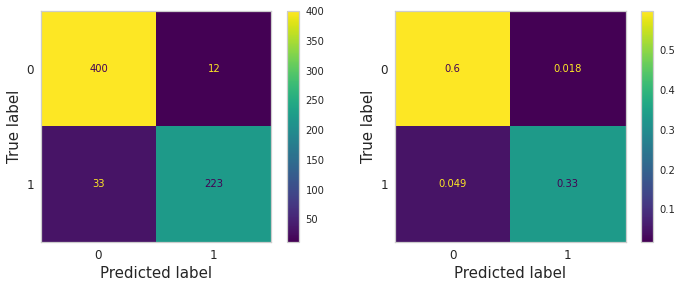

>> Test scores:
   Model  Accuracy     AUC  Recall   Prec.      F1  LogLoss Tact
0          0.8117  0.8283  0.7558  0.7558  0.7558    0.468     


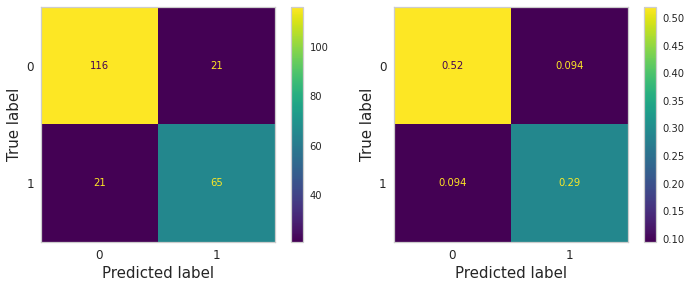

In [5]:
## Default model
model_name = "base__train__Accuracy-0.9326_AUC-0.9787__test__Accuracy-0.8117_AUC-0.8283__seed-111"
model = clf.load_model(os.path.join("./models", model_name))
train_scores = my.get_scores(model, train, train[target_name])
test_scores = my.get_scores(model, test, test[target_name])

print(">>", type(model.steps[-1][-1]))
# print(">>", [x[0] for x in model.steps[-1][-1].estimators])
# print(">>", model.steps[-1][-1])
print(">> Train scores:\n", train_scores)
my.show_confusion_matrix(model, train, train[target_name])
print(">> Test scores:\n", test_scores)
my.show_confusion_matrix(model, test, test[target_name])

### Baseline model

Transformation Pipeline and Model Successfully Loaded
>> <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
>> Train scores:
   Model  Accuracy     AUC  Recall   Prec.      F1  LogLoss Tact
0          0.8907  0.9522   0.832  0.8765  0.8537    0.281     


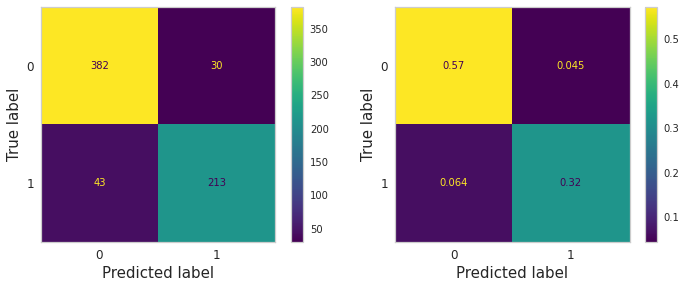

>> Test scores:
   Model  Accuracy    AUC  Recall   Prec.      F1  LogLoss Tact
0          0.8161  0.833  0.7326  0.7778  0.7545   0.4667     


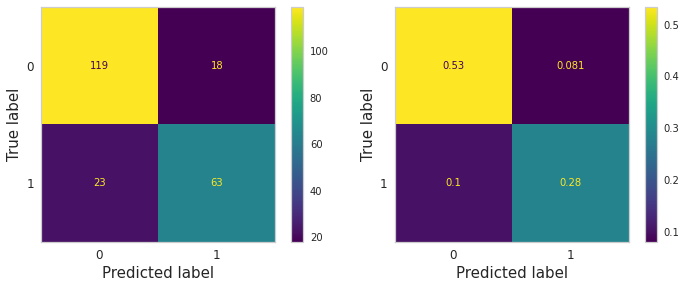

In [11]:
model_name = "base__train__Accuracy-0.8907_AUC-0.9522__test__Accuracy-0.8161_AUC-0.8330__seed-111"
model = clf.load_model(os.path.join("./models", model_name))
train_scores = my.get_scores(model, train, train[target_name])
test_scores = my.get_scores(model, test, test[target_name])

print(">>", type(model.steps[-1][-1]))
# print(">>", [x[0] for x in model.steps[-1][-1].estimators])
# print(">>", model.steps[-1][-1])
print(">> Train scores:\n", train_scores)
my.show_confusion_matrix(model, train, train[target_name])
print(">> Test scores:\n", test_scores)
my.show_confusion_matrix(model, test, test[target_name])

### Tuned models

In [7]:
## Baseline model
# model_name = ""
# model = clf.load_model(os.path.join("./models", model_name))
# train_scores = my.get_scores(model, train, train[target_name])
# test_scores = my.get_scores(model, test, test[target_name])

# print(">>", type(model.steps[-1][-1]))
# # print(">>", [x[0] for x in model.steps[-1][-1].estimators])
# # print(">>", model.steps[-1][-1])
# print(">> Train scores:\n", train_scores)
# my.show_confusion_matrix(model, train, train[target_name])
# print(">> Test scores:\n", test_scores)
# my.show_confusion_matrix(model, test, test[target_name])